<a href="https://colab.research.google.com/github/SanchitKulkarni1/MachineLearning/blob/main/CO2Emission(MultipleRegression).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install numpy
!pip install numpy
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/FuelConsumptionCo2.csv')
df.head() #taking a look at the dataset

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
cdf= df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY
0,2.0,4,8.5,196,9.9,6.7
1,2.4,4,9.6,221,11.2,7.7
2,1.5,4,5.9,136,6.0,5.8
3,3.5,6,11.1,255,12.7,9.1
4,3.5,6,10.6,244,12.1,8.7
5,3.5,6,10.0,230,11.9,7.7
6,3.5,6,10.1,232,11.8,8.1
7,3.7,6,11.1,255,12.8,9.0
8,3.7,6,11.6,267,13.4,9.5


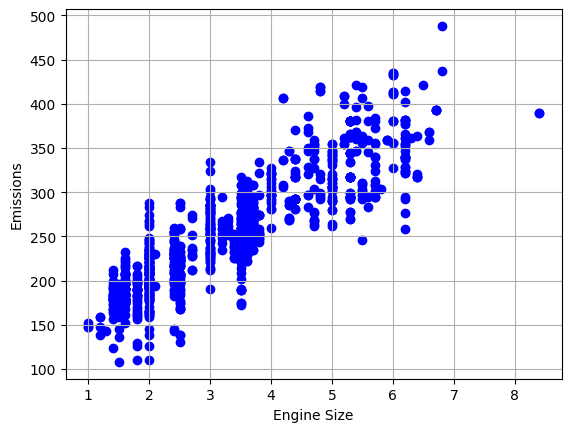

In [ ]:
#plotting the graph
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.grid(True)
plt.show()

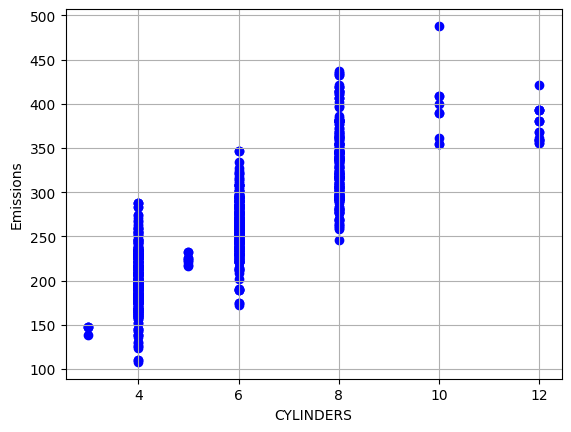

In [ ]:
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('CYLINDERS')
plt.ylabel('Emissions')
plt.grid(True)
plt.show()

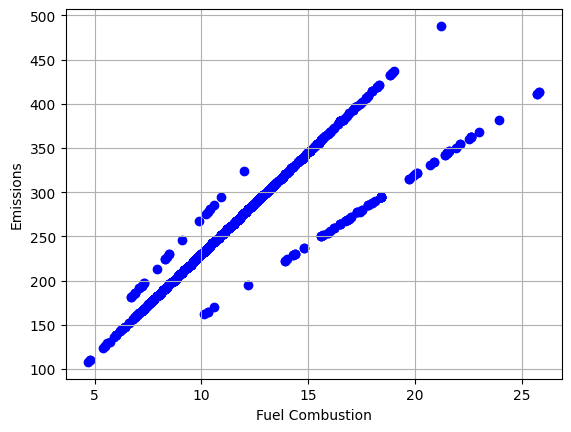

In [ ]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.xlabel('Fuel Combustion')
plt.ylabel('Emissions')
plt.grid(True)
plt.show()

In [ ]:
#for creating train and test dataset, we generate random rows using np.random.rand()
msk=np.random.rand(len(df))<0.8
train=cdf[msk]
test=cdf[~msk]

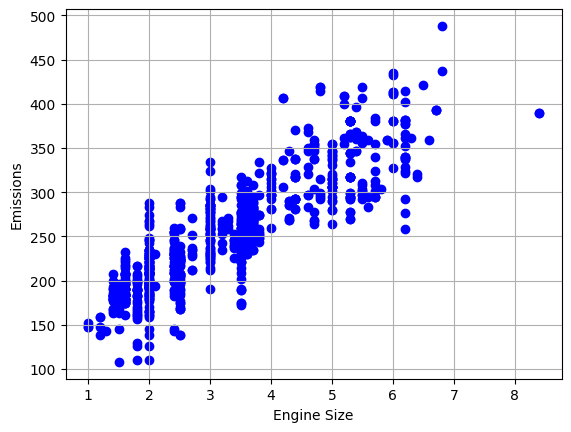

In [ ]:
#Train Data Distribution
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel('Engine Size')
plt.ylabel('Emissions')
plt.grid(True)
plt.show()

In [ ]:
#Multiple Regression Model
from sklearn import linear_model
regr=linear_model.LinearRegression()
x=np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)

#The coefficients
print('Coefficients: ', regr.coef_)


Coefficients:  [[10.10450368  7.59242258 10.00092868]]


In [ ]:
#Scikit-learn used Ordinary Least Squares method
#Prediction
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x=np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y=np.asanyarray(test[['CO2EMISSIONS']])

print("Mean Squared Error (MSE) : %.2f" % np.mean((y_hat - y) ** 2))

#Explained variance score : 1 is a perfect prediction
print("Variance Score: %.2f" %regr.score(x,y))

Mean Squared Error (MSE) : 652.81
Variance Score: 0.84


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
#Inputting random value and checking CO2 Emissions.
# Assuming 'regr' is your trained model from previous cells

# Define ranges for random values
engine_size_range = (1, 8)  # Example range for engine size
cylinders_range = (4, 12)  # Example range for cylinders
fuel_comb_range = (5, 25)  # Example range for fuel consumption comb

# Generate random values
num_samples = 5  # Number of random samples to generate
engine_size = np.random.rand(num_samples) * (engine_size_range[1] - engine_size_range[0]) + engine_size_range[0]
cylinders = np.random.randint(cylinders_range[0], cylinders_range[1] + 1, size=num_samples)
fuel_comb = np.random.rand(num_samples) * (fuel_comb_range[1] - fuel_comb_range[0]) + fuel_comb_range[0]

# Create a DataFrame
random_data = pd.DataFrame({
    'ENGINESIZE': engine_size,
    'CYLINDERS': cylinders,
    'FUELCONSUMPTION_COMB': fuel_comb
})

# Make predictions
predictions = regr.predict(random_data)

# Print the predictions
print(predictions)

[[243.39468879]
 [264.0301579 ]
 [265.18700022]
 [277.32619471]
 [270.99943939]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
